In [195]:
# import libs 
import os, glob
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 16, 8




In [196]:
path = r'A:\After_collage\Zep_task\task_2\datasets'
all_files = glob.glob(os.path.join(path, "*.csv"))

- ##  merge the file in one data fram

In [197]:

# take each CSV fie and create with it a data frame and then put it in dataFrames list and concat all the dataFrames in the end to single data frame 
#the final data frame is called "data"
all_df = []
for f in all_files:
    
    df = pd.read_csv(f, delimiter=',', quotechar='"')
    df['file'] = f.split('\\')[-1]
    all_df.append(df)
    
data = pd.concat(all_df, ignore_index=True, sort=True)
# the final data frame 


In [198]:
data

,download,file,lsa,operator,signal_strength,speed,technology
0,upload,April_MySpeed_2021.csv,Kerala,IDEA,-81,19160.0,4G
1,upload,April_MySpeed_2021.csv,Kerala,IDEA,-85,8632.0,4G
2,upload,April_MySpeed_2021.csv,Kerala,IDEA,-77,0.0,4G
3,upload,April_MySpeed_2021.csv,Kerala,IDEA,-99,12708.0,4G
4,download,April_MySpeed_2021.csv,Chennai,JIO,-105,9426.0,4G
...,...,...,...,...,...,...,...
3200296,download,September_MySpeed_2021.csv,NaN,Vi India,-110,9227.0,4G
3200297,download,September_MySpeed_2021.csv,NaN,Vi India,-107,387.0,4G
3200298,download,September_MySpeed_2021.csv,NaN,Vi India,-100,1532.0,4G
3200299,download,September_MySpeed_2021.csv,NaN,Vi India,-102,12495.0,4G


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200301 entries, 0 to 3200300
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   download         object 
 1   file             object 
 2   lsa              object 
 3   operator         object 
 4   signal_strength  object 
 5   speed            float64
 6   technology       object 
dtypes: float64(1), object(6)
memory usage: 170.9+ MB


- ## Data Cleanning 

#### THE MISSING value percentage

In [200]:
features_names=['download','file','lsa','operator','download','signal_strength','speed','technology']

percentage=[]
for colunm in features_names:
   percentage.append(((data[colunm].isna().sum())/data.shape[0]*100).round(2))


In [201]:
for i in range(len(percentage)):
    print('{} : {} %'.format(features_names[i],percentage[i]))

download : 0.0 %
file : 0.0 %
lsa : 30.62 %
operator : 0.0 %
download : 0.0 %
signal_strength : 3.53 %
speed : 17.69 %
technology : 0.0 %


### convert signal_strength to float 

In [202]:
def float_signal_strength(x):
    if x == "na":
        return np.NaN
    else:
        return float(x)
data["signal_strength"] = data["signal_strength"].apply(lambda x: float_signal_strength(x))

<AxesSubplot:>

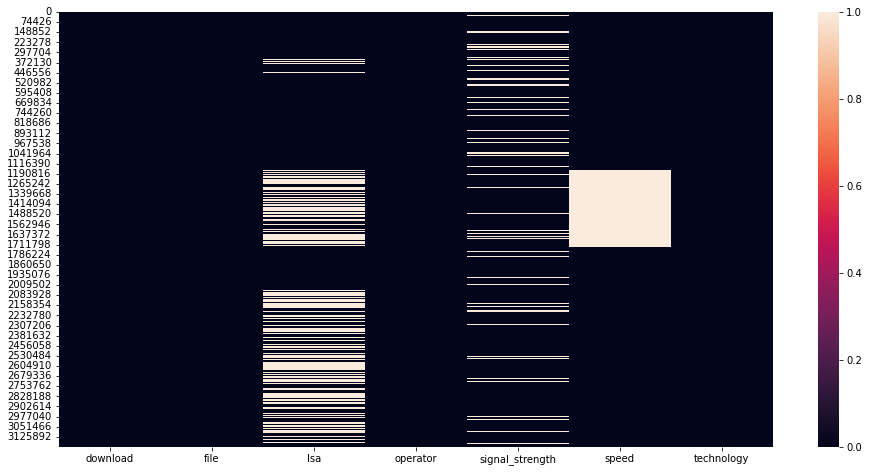

In [203]:
# missing values
sns.heatmap(data.isnull(),)

In [204]:
# seeing the unique of each feature 
unique_values=[]
for colunm in features_names:
    unique_values.append(len(data[colunm].unique()))


In [205]:
for i in range(len(unique_values)):
    print('{} : {} '.format(features_names[i],unique_values[i]))

download : 2 
file : 8 
lsa : 24 
operator : 7 
download : 2 
signal_strength : 64 
speed : 79281 
technology : 2 


In [206]:
# first deal with lsa : 30.62 %
data['lsa'].isna().sum()

980067

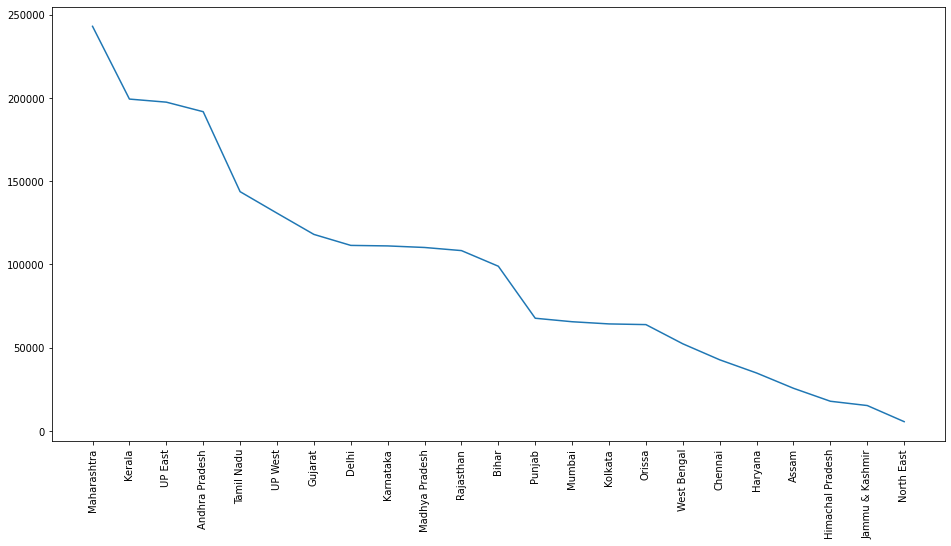

In [207]:
plt.plot(data['lsa'].value_counts())
plt.xticks(rotation = 90)
plt.show()

In [208]:
data['lsa'].fillna( method ='ffill', inplace = True)

In [209]:
data['lsa'].isna().sum()

0

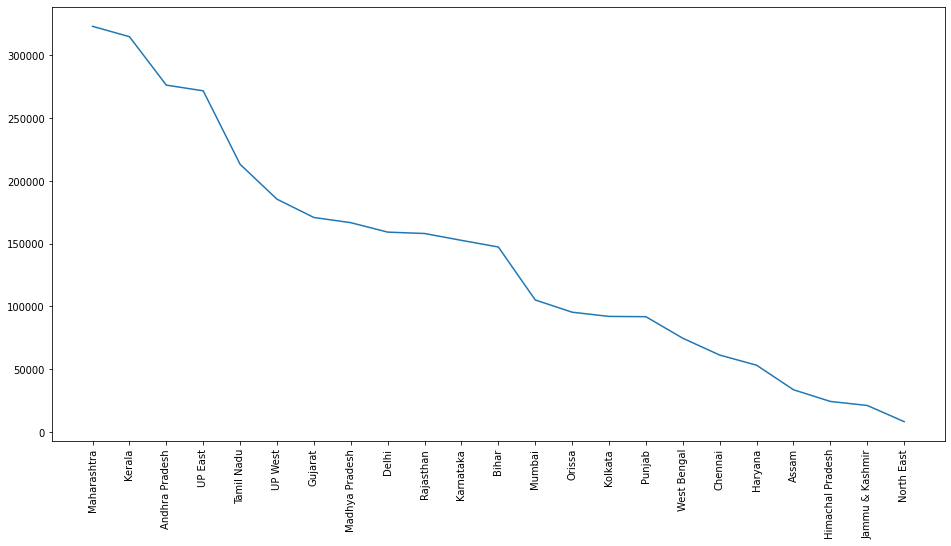

In [210]:
plt.plot(data['lsa'].value_counts())
plt.xticks(rotation = 90)

plt.show()

In [211]:
data['speed'].isna().sum()

566279

In [212]:
new_value=data['speed'].mean()
data['speed'].fillna(new_value, inplace = True)


In [213]:
data['speed'].isna().sum()

0

In [214]:
data['signal_strength'].value_counts()

-90.0     131629
-103.0     78189
-97.0      78164
-105.0     76678
-101.0     75359
           ...  
-58.0       5274
-56.0       2601
-54.0        849
-52.0        608
-50.0        236
Name: signal_strength, Length: 63, dtype: int64

In [215]:
new_value=data['signal_strength'].mean()
data['signal_strength'].fillna(new_value, inplace = True)


In [216]:
data['signal_strength'].value_counts()

-88.305822     431201
-90.000000     131629
-103.000000     78189
-97.000000      78164
-105.000000     76678
                ...  
-58.000000       5274
-56.000000       2601
-54.000000        849
-52.000000        608
-50.000000        236
Name: signal_strength, Length: 64, dtype: int64

In [217]:
data['signal_strength'].isna().sum()

0

In [218]:
features_names=['download','file','lsa','operator','download','signal_strength','speed','technology']

percentage=[]
for colunm in features_names:
   percentage.append(((data[colunm].isna().sum())/data.shape[0]*100).round(2))


In [219]:
for i in range(len(percentage)):
    print('{} : {} %'.format(features_names[i],percentage[i]))
    

download : 0.0 %
file : 0.0 %
lsa : 0.0 %
operator : 0.0 %
download : 0.0 %
signal_strength : 0.0 %
speed : 0.0 %
technology : 0.0 %


- ## Convert Speed Kbps to Mbps


In [220]:
def convertSpeed (KBspeed):
    return float(KBspeed/1024)

data['speed']=data['speed'].apply(convertSpeed)

In [221]:
data

,download,file,lsa,operator,signal_strength,speed,technology
0,upload,April_MySpeed_2021.csv,Kerala,IDEA,-81.0,18.710938,4G
1,upload,April_MySpeed_2021.csv,Kerala,IDEA,-85.0,8.429688,4G
2,upload,April_MySpeed_2021.csv,Kerala,IDEA,-77.0,0.000000,4G
3,upload,April_MySpeed_2021.csv,Kerala,IDEA,-99.0,12.410156,4G
4,download,April_MySpeed_2021.csv,Chennai,JIO,-105.0,9.205078,4G
...,...,...,...,...,...,...,...
3200296,download,September_MySpeed_2021.csv,Kerala,Vi India,-110.0,9.010742,4G
3200297,download,September_MySpeed_2021.csv,Kerala,Vi India,-107.0,0.377930,4G
3200298,download,September_MySpeed_2021.csv,Kerala,Vi India,-100.0,1.496094,4G
3200299,download,September_MySpeed_2021.csv,Kerala,Vi India,-102.0,12.202148,4G


In [222]:
data.describe(include=['O'])

,download,file,lsa,operator,technology
count,3200301,3200301,3200301,3200301,3200301
unique,2,8,23,7,2
top,download,October_MySpeed_2021.csv,Maharashtra,JIO,4G
freq,1601560,640334,323133,1736318,3114168


- ## Data Visualization

technology
3G      86133
4G    3114168
Name: technology, dtype: int64


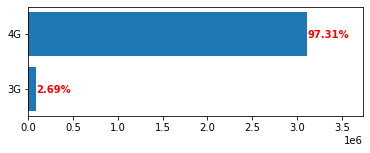

download
upload      1598741
download    1601560
Name: download, dtype: int64


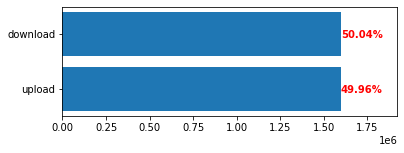

operator
BSNL          12619
CELLONE       68197
IDEA          86493
VODAFONE      92856
Vi India     334477
AIRTEL       869341
JIO         1736318
Name: operator, dtype: int64


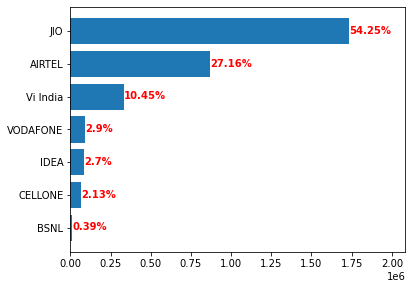

lsa
North East            8214
Jammu & Kashmir      21110
Himachal Pradesh     24314
Assam                33623
Haryana              53180
Chennai              61261
West Bengal          74651
Punjab               91825
Kolkata              92047
Orissa               95412
Mumbai              105155
Bihar               147344
Karnataka           152630
Rajasthan           158093
Delhi               159195
Madhya Pradesh      166718
Gujarat             170847
UP West             185415
Tamil Nadu          213225
UP East             271761
Andhra Pradesh      276281
Kerala              314867
Maharashtra         323133
Name: lsa, dtype: int64


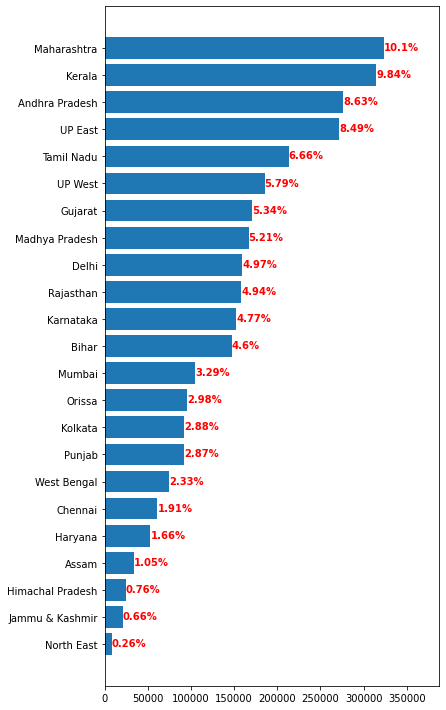

In [223]:

columns = ['technology', 'download', 'operator', 'lsa']

for column in columns:

    unique_values = data[column].unique()

    g = data.groupby(column)[column].count().sort_values(ascending=True)

    r = np.arange(len(unique_values))
   

    print(g.head(len(unique_values)))

    plt.figure(figsize = (6, len(unique_values)/2 +1))

    plt.barh(y = r, width = g.head(len(unique_values)))

    total = sum(g.head(len(unique_values)))

    for (i, u) in enumerate(g.head(len(unique_values))):
        plt.text(x = u + 0.2, y = i - 0.08, s = str(round(u/total*100, 2))+'%', color = 'red', fontweight = 'bold')

    plt.margins(x = 0.2)

    plt.yticks(r, g.index)

    plt.show()

### Throughput Analysis across the Telecom Circles
- Maximum upload and download throughput recorded was at Himachal Pradesh circle
- Minimum upload and download throughput recorded is 0 Mbps
- North East has very low average throughput in download
- maharasht is the highest in the Lsa feature 
- jio is the most user operator and the lowest is BSNL

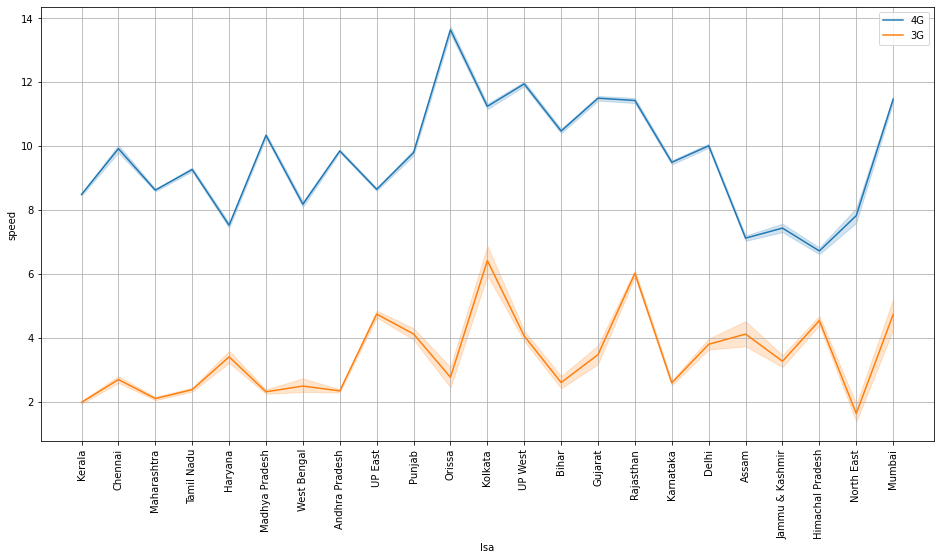

In [224]:
sns.lineplot(y=data['speed'],x=data['lsa'],hue=data['technology'])
plt.xticks(rotation = 90)
plt.grid(True)
plt.legend()
plt.show()

### my observation 
- 4G speed is much higher from 3G speed 
- the highest in 4G is orissa 
- the highest in 3G is kolkata

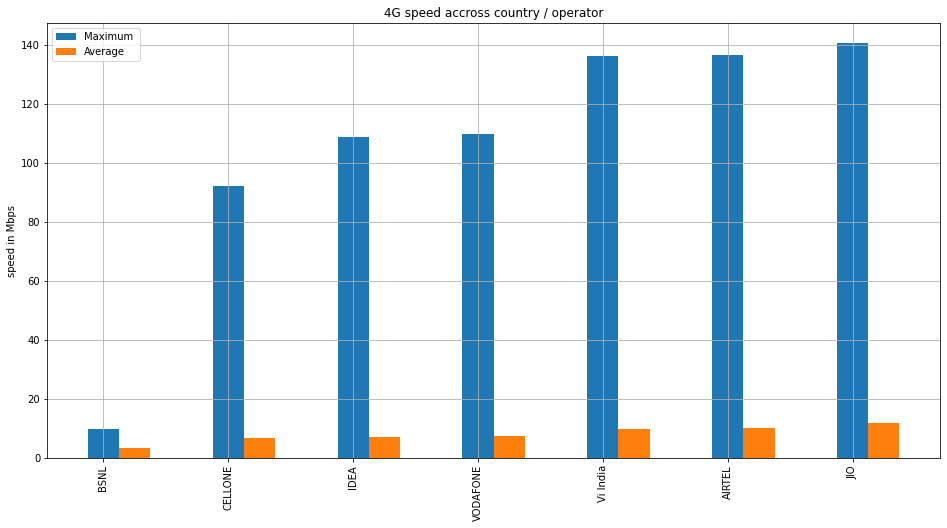

In [225]:
fig = plt.figure()

width = 0.25 
# Plotting the bars
y = data[data["technology"]=="4G"].groupby('operator')['speed'].max().sort_values()
x_indexes = np.arange(len(y.index))
z = data[data["technology"]=="4G"].groupby('operator')['speed'].mean().sort_values()
plt.title("4G speed accross country / operator")
plt.bar(y.index,y, width,label="Maximum ") 
plt.bar(x_indexes+width,z, width,label="Average") 
plt.ylabel('speed in Mbps')
plt.xticks(rotation = 90)
plt.grid(True)
plt.legend()


### my observation 
- JIO is the higher is maximun speed and average spped 
- BSNL is the lowest in both 

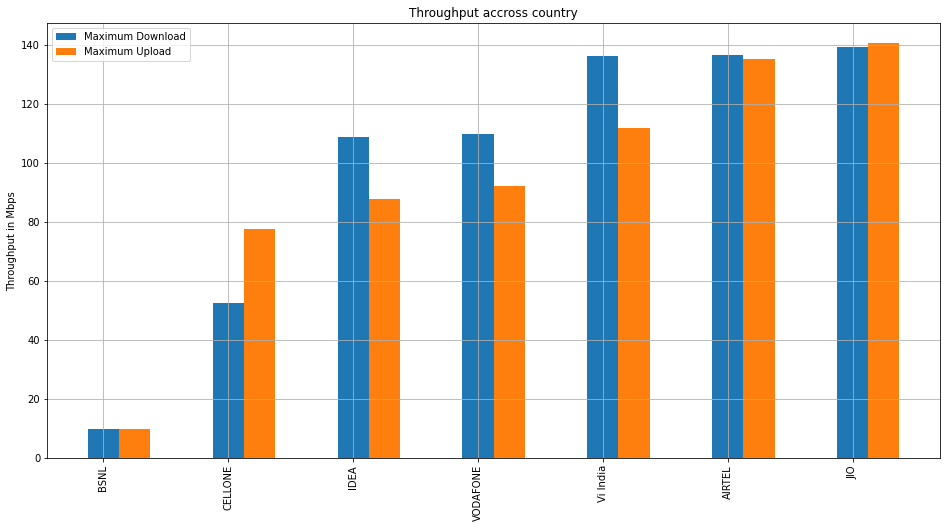

In [226]:
fig = plt.figure()
rcParams['figure.figsize'] = 16, 8
width = 0.25 
# Plotting the bars

y = data[data["download"]=="download"].groupby('operator')['speed'].max().sort_values()
z = data[data["download"]=="upload"].groupby('operator')['speed'].max().sort_values()
x_indexes = np.arange(len(y.index))
plt.title("Throughput accross country")
plt.bar(y.index,y, width,label="Maximum Download") 
plt.bar(x_indexes+width,z, width,label="Maximum Upload") 
plt.ylabel('Throughput in Mbps')

plt.xticks(rotation = 90)
plt.grid(True)
plt.legend()


### my observation 
- JIO is the highest in maximun download and upload 
- BSNL is the lowest in both 
- CELLONE has a Upload higher than the Download 
- all other Lsa has maximun download higher than maximun upload except JIO and CELLONE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


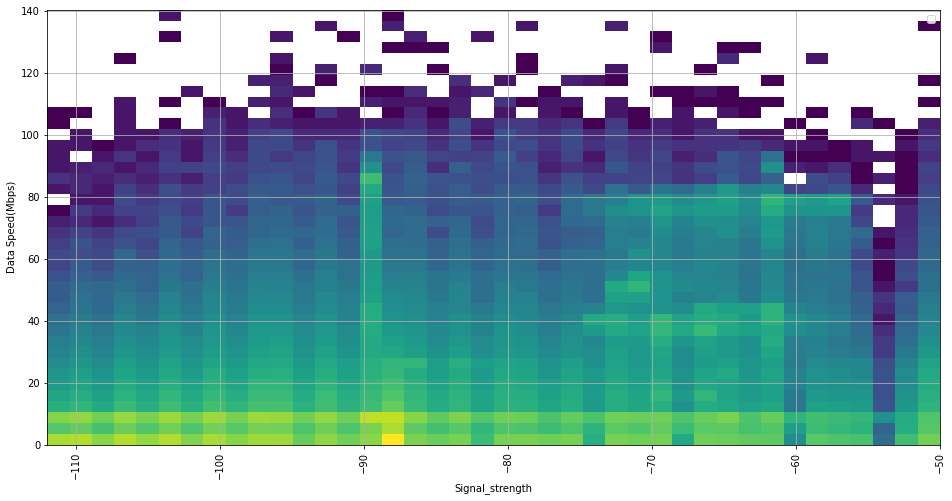

In [227]:
fig = plt.figure()
import matplotlib.colors as colors
x = data['signal_strength']
y = data['speed']
plt.hist2d(x, y, bins = 40, norm=colors.LogNorm())
plt.ylabel('Data Speed(Mbps)')
plt.xlabel('Signal_strength')

plt.xticks(rotation = 90)
plt.grid(True)
plt.legend()

plt.show()

In [229]:
data.drop(['file'],inplace=True,axis=1)

In [230]:
data['download'].unique()

array(['upload', 'download'], dtype=object)

# one hot encoder

In [231]:
encoded_Data=pd.get_dummies(data,drop_first=True)

In [232]:
encoded_Data

,signal_strength,speed,download_upload,lsa_Assam,lsa_Bihar,lsa_Chennai,lsa_Delhi,lsa_Gujarat,lsa_Haryana,lsa_Himachal Pradesh,...,lsa_UP East,lsa_UP West,lsa_West Bengal,operator_BSNL,operator_CELLONE,operator_IDEA,operator_JIO,operator_VODAFONE,operator_Vi India,technology_4G
0,-81.0,18.710938,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,-85.0,8.429688,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,-77.0,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,-99.0,12.410156,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,-105.0,9.205078,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200296,-110.0,9.010742,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3200297,-107.0,0.377930,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3200298,-100.0,1.496094,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3200299,-102.0,12.202148,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


<AxesSubplot:>

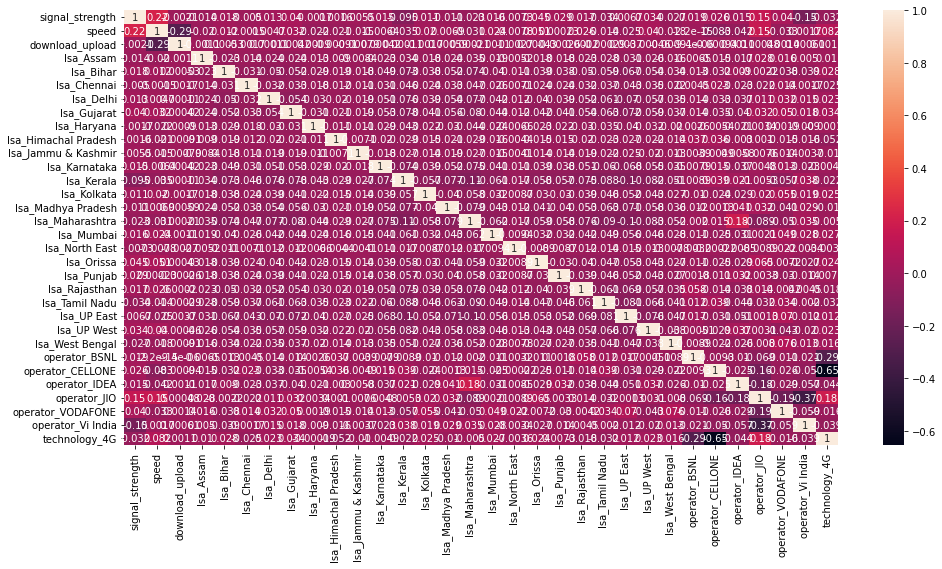

In [241]:

sns.heatmap(encoded_Data.corr(),annot=True)

In [233]:
X=encoded_Data.drop('download_upload',axis=1)
y=encoded_Data['download_upload']

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [236]:
from sklearn.tree import DecisionTreeClassifier

In [237]:
model = DecisionTreeClassifier()

In [238]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [239]:
model.score(X_train,y_train)

0.8951278354967654

In [240]:
model.score(X_test,y_test)

0.700018937600606

In [255]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [253]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [250]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [252]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)


[15:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [254]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.494495


In [256]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[15:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [257]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.499999,6.055940e-08,0.500000,2.799802e-08
1,0.499981,2.440174e-05,0.499981,2.510281e-05
2,0.498183,2.515307e-03,0.498171,2.535366e-03
3,0.498164,2.540443e-03,0.498152,2.562049e-03
4,0.498148,2.560983e-03,0.498135,2.584068e-03


In [258]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.465814
Name: test-rmse-mean, dtype: float64
